The information of the data can be found <a href="https://docs.aws.amazon.com/redshift/latest/dg/c_sampledb.html">here</a>.

<b><a href="https://app.datacamp.com/workspace/w/64eea975-7381-4eb0-b521-cd390d13fda0">Ticket Sales Data Analysis Using SQL</a></b>

Questions:
1. How many events happened in each city?
2. Who are the best sellers for events in New York City in 2008?
3. What are the best-selling venues based on tickets sold?
4. What are the highest-grossing events?
5. What are the lowest selling type of events?


<b>1. How many events happened in each city?</b>

In [ ]:
SELECT venuecity, COUNT(eventid) AS event FROM venue
JOIN event ON venue.venueid=event.venueid
GROUP BY venuecity ORDER BY event DESC

,venuecity,event
0,New York City,2647
1,Los Angeles,312
2,Las Vegas,300
3,Chicago,209
4,San Francisco,194
...,...,...
74,Montreal,27
75,Newark,27
76,Irving,25
77,Sunrise,24


<b>2. Who are the best sellers for events in New York City in 2008?</b>

In [ ]:
WITH event_venue AS (SELECT venuecity, eventid FROM venue 
                     JOIN event ON venue.venueid=event.venueid)

SELECT sellerid, (firstname||' '||lastname) AS name, SUM(qtysold) AS Sold FROM sales
INNER JOIN users ON users.userid=sales.sellerid 
INNER JOIN date ON sales.dateid=date.dateid
INNER JOIN event_venue ON sales.eventid=event_venue.eventid
WHERE year=2008 AND venuecity='New York City'
GROUP BY 1,2
ORDER BY sold DESC

,sellerid,name,sold
0,43237,Logan David,27
1,24786,Summer Marsh,25
2,26419,Patricia Espinoza,25
3,39548,Clementine Randolph,25
4,8084,Elliott Kennedy,24
...,...,...,...
22939,49761,Palmer Hayden,1
22940,49872,Gray Bonner,1
22941,49926,Quamar Cole,1
22942,49962,Fletcher Maldonado,1


<b>3. What are the best-selling venues based on tickets sold?</b>

In [ ]:
WITH event_qty AS (SELECT sales.eventid, venueid, SUM(qtysold) AS qtysold FROM sales 
                   JOIN event ON sales.eventid=event.eventid GROUP BY 1,2)

SELECT venuename, venuecity, SUM(qtysold) AS tickets_sold FROM venue
JOIN event_qty ON venue.venueid=event_qty.venueid
GROUP BY 1,2
ORDER BY tickets_sold DESC


,venuename,venuecity,tickets_sold
0,Lunt-Fontanne Theatre,New York City,3326
1,August Wilson Theatre,New York City,3187
2,Hilton Theatre,New York City,2999
3,Helen Hayes Theatre,New York City,2948
4,Nederlander Theatre,New York City,2934
...,...,...,...
196,Sahara Hotel,Las Vegas,751
197,Pengrowth Saddledome,Calgary,728
198,Wynn Hotel,Las Vegas,660
199,Mandalay Bay Hotel,Las Vegas,658


<b>4. What are the highest-grossing events?</b>

In [ ]:
SELECT eventname, SUM(pricepaid) AS sales FROM sales 
JOIN event ON sales.eventid=event.eventid GROUP BY 1 ORDER BY sales DESC


,eventname,sales
0,Mamma Mia!,1135454.0
1,Spring Awakening,972855.0
2,The Country Girl,910563.0
3,Macbeth,862580.0
4,Jersey Boys,811877.0
...,...,...
571,Rascal Flatts,38214.0
572,Linda Ronstadt,35043.0
573,Beach Boys,30383.0
574,Joshua Radin,23469.0


<b>5. What are the lowest selling type of events?</b>

In [ ]:
WITH event_qty AS(SELECT catid, SUM(qtysold) AS tickets_sold FROM event 
                  JOIN sales ON event.eventid=sales.eventid GROUP BY 1)

SELECT catname AS type_of_events, tickets_sold FROM category 
JOIN event ON category.catid=event.catid
JOIN event_qty ON category.catid=event_qty.catid
GROUP BY 1,2
ORDER BY 2 ASC

,type_of_events,tickets_sold
0,Opera,19787
1,Musicals,51573
2,Plays,78545
3,Pop,195444


Visualize the table

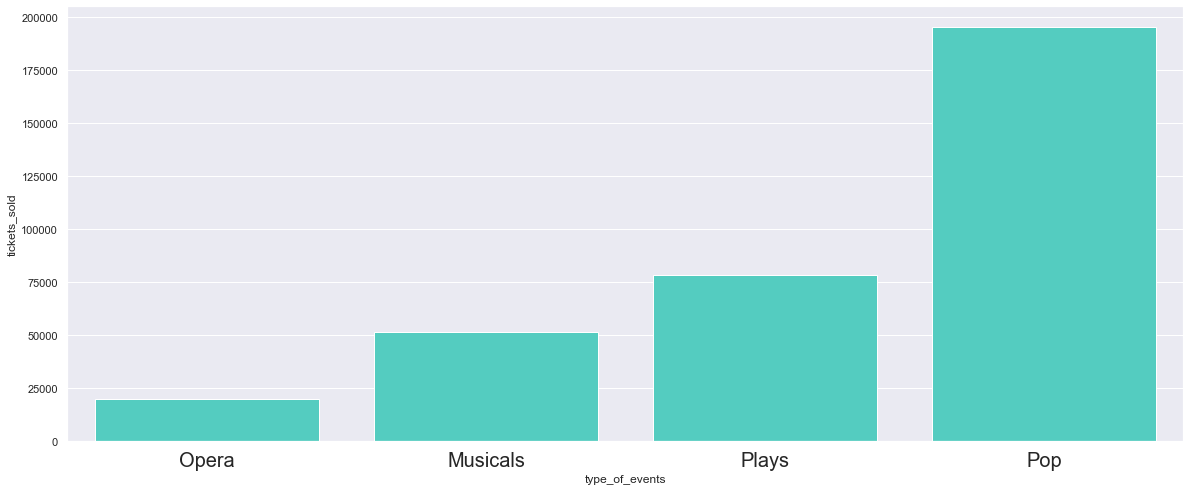

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
fig.set_size_inches(20,8)
sns.set(font_scale=1)

sns.barplot(x='type_of_events', y='tickets_sold', data=dfevent, color='turquoise')
locs,labels=plt.xticks()
plt.setp(labels,fontsize=20)
plt.show()